# Research: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set is from The Movie Database and includes multiple datapoints about 10,000 different movies. I will find some basic information about the data, and run a few correlation checks along with find several maximums, minimums, and averages. Here are the main questions we attempt to answer:

- Is there any correlation between the revenue and popularity?
- Is there a correlation between popularity and vote average?
- What is the most common average vote? WHat is the mean average vote?
- Do certain months hav a higher adjusted revenue for movie releases?
- What genre has the highest avearge popularity?
- What are the movies with the highest and lowest adjusted revenue of all time, and what is the mean adjusted revenue?

> #### These are the main questions we will attempt to answer, but if the findings look interesting, we may explore deeper.

In [3]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')

pd.set_option('display.max_rows', 16)

<a id='wrangling'></a>
## Data Wrangling

### General Properties
#### I am going to pull the data into the notebook and then check the data quality.

In [4]:
data = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
#I'm going to go ahead and load this straight from the site, there is no need to save it locally for this analysis

In [5]:
data.head() #I want to preview the data, so I call for just the first 5 rows using .head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
data.dtypes #I want to go ahead and check out the data types of the columns, so I use .dtypes to view this

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
                         ...   
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
data.isnull().any() #Now that I know the data types, I can check to see if any of the columns contain nulls

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
                        ...  
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [8]:
0 in data.values 
# I want to also see if there are any 0 values, as I will be performing stat functions and these may throw off my findings

True

### Data cleaning step 1:
#### There are several columns with nulls, but for this analysis I will be using only one of the columns that contains nulls. I will replace the genre column with 'Unknown' after i replace the dataframe with the wanted columns.

In [6]:
data = data[['original_title','genres','popularity','budget','revenue','original_title','vote_average','release_date',\
             'release_year','budget_adj','revenue_adj']]

In [7]:
data.isnull().any() #Once again I will check for nulls to verify the columns I need to edit

original_title    False
genres             True
popularity        False
budget            False
revenue           False
original_title    False
vote_average      False
release_date      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [8]:
data['genres'].fillna('Unknown', inplace = True) #I decide to replace the null values with 'Unknown'

In [9]:
data['genres'].isnull().any() #I verify that I have no null values remaining

True

### Data cleaning step 2:
#### Now I know that the columns I am using contain no nulls. Now, I want to do something about those dates not being in date time format.

In [10]:
data['release_date'] = pd.to_datetime(data['release_date']) # set object type to a date

In [11]:
data['release_month'] = pd.DatetimeIndex(data['release_date']).month # convert the data to a numerical month

In [12]:
data['release_month'].head() # time to preview the data again

0     6
1     5
2     3
3    12
4     4
Name: release_month, dtype: int32

#### Now that that is done, I can check some basic info about the data/

In [13]:
data.size #verifying the size of the dataframe

130392

In [14]:
data.describe() #lets see if we can see some basic information about the dataframe

,popularity,budget,revenue,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,5.974922,2001.322658,1.755104e+07,5.136436e+07,6.827259
std,1.000185,3.091321e+07,1.170035e+08,0.935142,12.812941,3.430616e+07,1.446325e+08,3.441802
min,0.000065,0.000000e+00,0.000000e+00,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207583,0.000000e+00,0.000000e+00,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383856,0.000000e+00,0.000000e+00,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713817,1.500000e+07,2.400000e+07,6.600000,2011.000000,2.085325e+07,3.369710e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


#### Thoughts:
    Calling for the describe, we can already see some useful information about the data. The statistical information about the data may come in useful later.

<a id='eda'></a>
## Exploratory Data Analysis

## First Question:
    Is there any correlation between the revenue and the average popularity?

In [15]:
data['revenue_adj'].corr(data['popularity']) #I can check correlation using .corr

0.60908343228185846

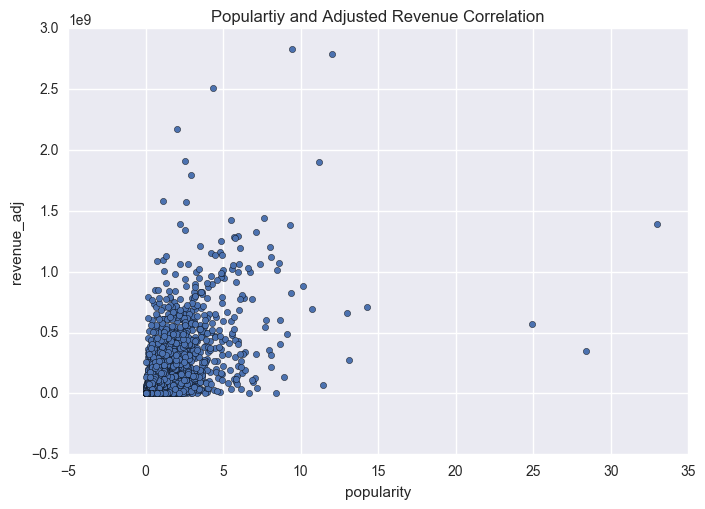

In [34]:
data.plot.scatter(x = 'popularity', y = 'revenue_adj', title = 'Populartiy and Adjusted Revenue Correlation')

#### Findings:
the correlation between revenue and popularity is on the bottom end of a strong correlation. With this being said, they do correlate.

## Second Question:
    Is there a correlation between popularity and vote average?

In [17]:
data['popularity'].corr(data['vote_average'])

0.20951130747540375

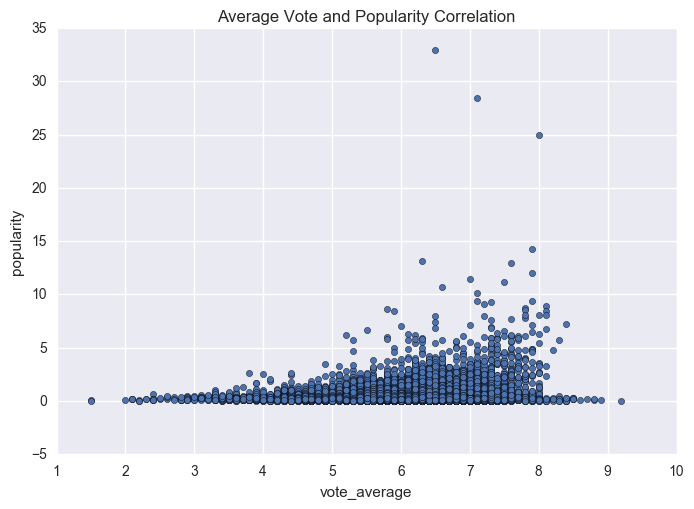

In [35]:
data.plot.scatter(x = 'vote_average', y = 'popularity', title = 'Average Vote and Popularity Correlation')

#### Findings:
The correlation between popularity and vote average is weak.

## Third Question:
    What is the most common average vote? What is the mean average vote?

In [19]:
print(data['vote_average'].count()) #lets find out how many average votes there were total
print(data['vote_average'].mode()) #lets find the most occuring average vote
print(data['vote_average'].mean()) #lets find the mean average vote

10866
0    6.1
dtype: float64
5.97492177434


#### Findings:
The average vote that occurs the most is 6.1, and the mean vote is 5.97. Now, lets take a look at a histogram that shows us the distribution of the votes.

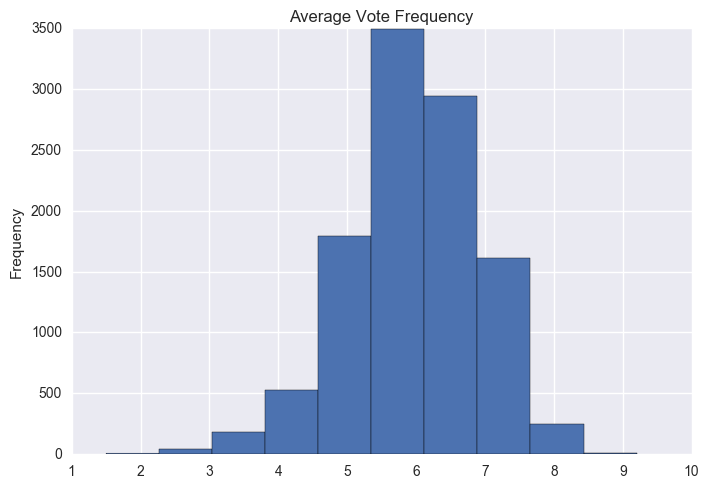

In [36]:
data['vote_average'].plot.hist(title = 'Average Vote Frequency')

#### Findings:
From the data, we an see that most vote averages for movies fall between 5.3 and 6.1.

## Fourth Question:
    Do certain months have a higher adusted revenue for movie releases?

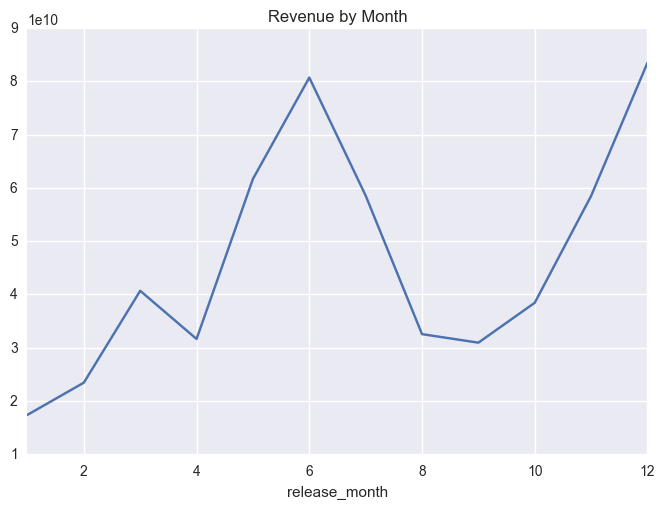

In [21]:
data.groupby(data['release_month'])['revenue_adj'].sum().plot(kind = 'line', title = 'Revenue by Month')

#### Findings:
There is a sharp increase stating in April and peaking in June, that quickly falls down to August. At the end of the year there is also a sharp increase, which quickly falls in January. This may be attributed to several factors:
- There is such a thing as 'Summer movies'. Relesed during the summer purposely as many people like to get out and about.
- There is usually more holiday offtime during the end of the year. People are able to get out and see movies.
- During the beginning of the year, most people are recovering from the holidays. Also, these are normally the coldest months.

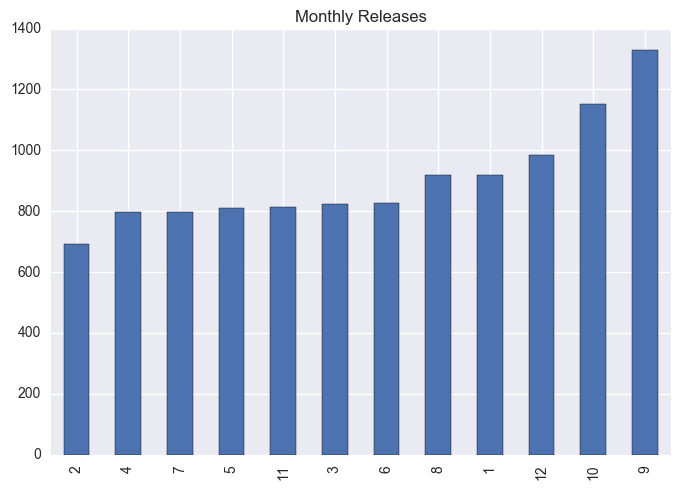

In [22]:
data['release_month'].value_counts().sort_values().plot(kind = 'bar', sort_columns = True, title = 'Monthly Releases')

#### Findings:
The most releases are in September, and the fewest releases are in February. This doesn't reflect that the ammount of movie releases in a given month necessarily reflects revenue.

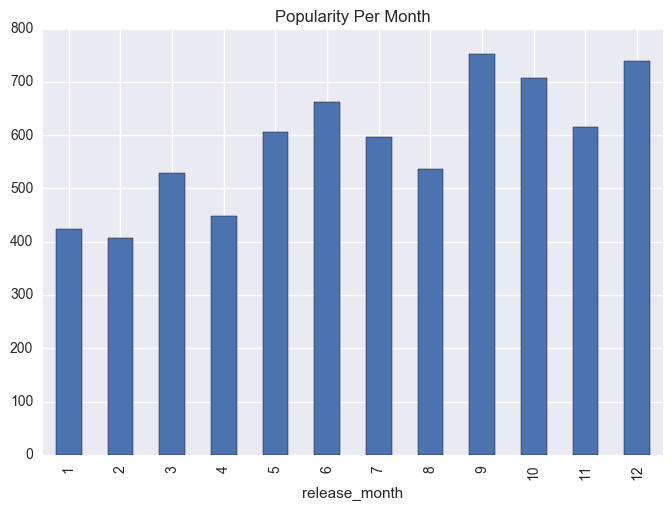

In [23]:
data.groupby(data['release_month'])['popularity'].sum().plot(kind = 'bar', title = 'Popularity Per Month')

#### Findings:
From looking at this graph, we can now see that the popularity generally lines up with the revenue for the given months. So the June and December movies are more popular for their release than the January and February movies.

#### Now I want to know:
Did different years make a significant difference in adjusted revenue?

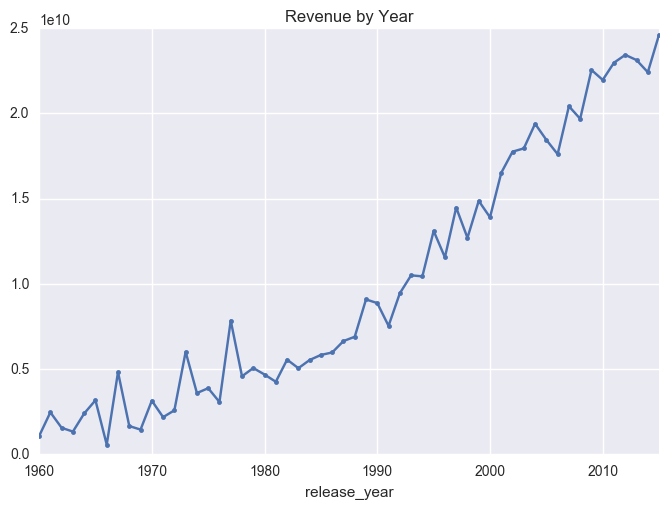

In [24]:
data.groupby(data['release_year'])['revenue_adj'].sum().plot(kind = 'line', title = 'Revenue by Year', style = '.-')

#### Findings:
Over the years, movies are bringing in more revenue. Could this be because of viewers having more access to these movies? I believe it is, and advertising campaigns have increased.

## Fifth Question:
    What genre has the highest average popularity? The lowest?

In [25]:
genres_pop = data.groupby('genres').agg({'popularity':['mean'],})
print(genres_pop.head()) #I am going to group the genres, and the perform aggregation on the popularity key (the one i want)

                                         popularity
                                               mean
genres                                             
Action                                     0.591587
Action|Adventure                           0.690710
Action|Adventure|Animation                 0.454663
Action|Adventure|Animation|Comedy|Drama    0.370019
Action|Adventure|Animation|Comedy|Family   0.063246


In [26]:
genres_pop.columns = genres_pop.columns.droplevel()
print(genres_pop.head()) # I used .droplevel() to drop the 0 axis, which is popularity

                                              mean
genres                                            
Action                                    0.591587
Action|Adventure                          0.690710
Action|Adventure|Animation                0.454663
Action|Adventure|Animation|Comedy|Drama   0.370019
Action|Adventure|Animation|Comedy|Family  0.063246


In [27]:
print(genres_pop.loc[genres_pop['mean'].idxmax()])
print(genres_pop.loc[genres_pop['mean'].idxmin()])
# By using .loc and .idxmax/idxmin in the same line, I can put all of the information based on those values

mean    13.112507
Name: Adventure|Science Fiction|Thriller, dtype: float64
mean    0.000188
Name: Mystery|Comedy|Drama, dtype: float64


#### Findings:
The genre with the highest mean popularity was Adventure/Science Fiction/Thriller, an the genre with the lowest mean popularity was Mystery/Comedy/Drama. This makes me want to find out what the same information is for user vote.

In [28]:
genre_vote = data.groupby('genres').agg({'vote_average': ['mean'],})
print(genre_vote.head()) # I will do the same thing here that I did before

                                         vote_average
                                                 mean
genres                                               
Action                                       5.526984
Action|Adventure                             5.333333
Action|Adventure|Animation                   6.775000
Action|Adventure|Animation|Comedy|Drama      5.600000
Action|Adventure|Animation|Comedy|Family     6.100000


In [29]:
genre_vote.columns = genre_vote.columns.droplevel()
print(genre_vote.head())

                                              mean
genres                                            
Action                                    5.526984
Action|Adventure                          5.333333
Action|Adventure|Animation                6.775000
Action|Adventure|Animation|Comedy|Drama   5.600000
Action|Adventure|Animation|Comedy|Family  6.100000


In [30]:
print(genre_vote.loc[genre_vote['mean'].idxmax()])
print(genre_vote.loc[genre_vote['mean'].idxmin()])

mean    8.8
Name: Drama|Horror|Mystery|Science Fiction|Thriller, dtype: float64
mean    2.6
Name: Adventure|Action|Fantasy|Horror|Science Fiction, dtype: float64


#### Findings:
The genre with the highest mean user votes is Drama/Horor/Mystery/Science, and the lowest is
Adventure/Action/Fantasy/Horror.

## Sixth Question:
    What are the movies with the highest and lowest adjusted revenue of all time, and what is the mean adjusted revenue?

In [31]:
print(data.loc[data['revenue_adj'].idxmax()])
print(data.loc[data['revenue_adj'].idxmin()])

original_title                                      Avatar
genres            Action|Adventure|Fantasy|Science Fiction
popularity                                         9.43277
budget                                           237000000
revenue                                         2781505847
original_title                                      Avatar
vote_average                                           7.1
release_date                           2009-12-10 00:00:00
release_year                                          2009
budget_adj                                     2.40887e+08
revenue_adj                                    2.82712e+09
release_month                                           12
Name: 1386, dtype: object
original_title               Wild Card
genres            Thriller|Crime|Drama
popularity                     2.93234
budget                        30000000
revenue                              0
original_title               Wild Card
vote_average                    

#### What is the mean of the adjusted revenue?

In [32]:
print(data['revenue_adj'].mean())

51364363.2533


#### Findings:
The movies are Avatar with the highest adjusted revenue, and Wild Card with the lowest. The mean adjusted revenue is $51,364,363

<a id='conclusions'></a>
## Conclusions:
- There is strong positive correlation between adjusted revenue and popularity.
- There is weak positive correlation between vote average and popularity.
- Most vote averages fall between 5.3 and 6.1.
- Summer and end of year movies have the highest adjusted revenue, while start of year movies have the lowest.
- Most movie release are in September, but September release receives the third lowest adjusted revenue.
- September movies have the highest combined popularity, but this may be because September has the most releases.
- Adjusted revenue for movies has generally increased over the years.
- The genre with the highest mean popularity was Adventure/Science Fiction/Thriller, an the genre with the lowest mean   popularity was Mystery/Comedy/Drama. This makes me want to find out what the same information is for user vote.
- The genre with the highest mean user votes is Drama/Horor/Mystery/Science, and the lowest is Adventure/Action/Fantasy/Horror
- The movies with the highest and lowest adjusted revenue are Avatar and Wild Car respectively.